In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [3]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [4]:
df['Surge_Pricing_Type'].value_counts()

,count
Surge_Pricing_Type,
2,56728
3,47720
1,27214


### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода.

Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [5]:
### Центрируем данные

X_centered = X - X.mean()

In [6]:
### Выделим первые две главные компоненты

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
X_pca = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
X_pca.head()

,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [7]:
print(f"Первая и вторая компоненты объясняют {pca.explained_variance_ratio_} долю дисперсии соответственно.")

Первая и вторая компоненты объясняют [0.63176117 0.21129863] долю дисперсии соответственно.


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
Какие признаки коррелируют с первой компонентой? Какие со второй?


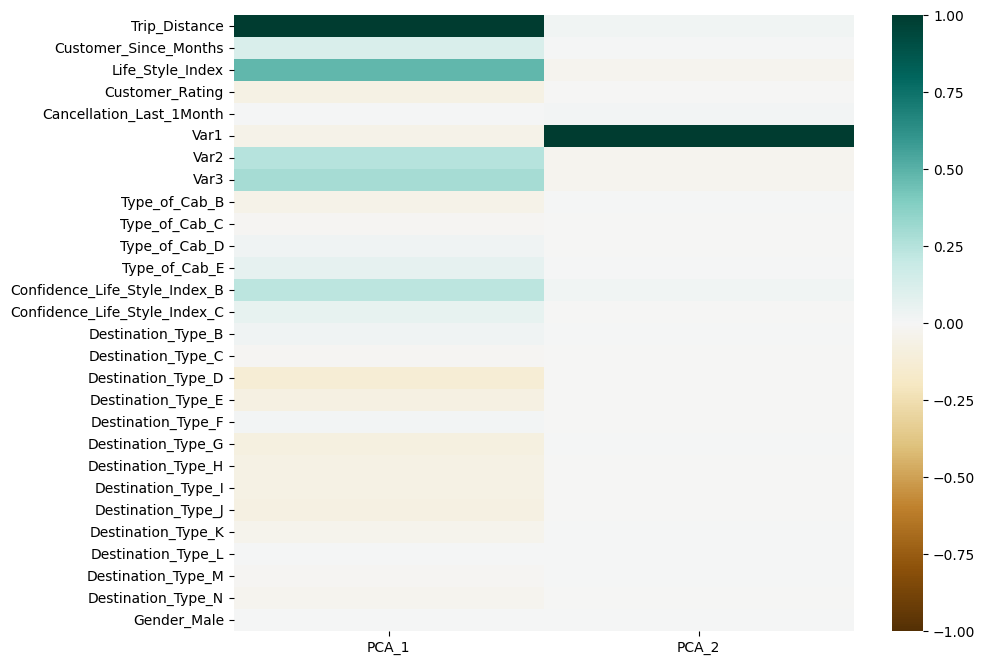

In [8]:
### Попарные корреляции между новыми векторами и старой табличкой

pc1_corr = X.corrwith(X_pca['PCA_1'])
pc2_corr = X.corrwith(X_pca['PCA_2'])

corrs = pd.concat((pc1_corr, pc2_corr), axis=1)
corrs.columns = ['PCA_1', 'PCA_2']

plt.figure(figsize=(10, 8))
sns.heatmap(corrs,
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1);

--- Первая включает в себя в основном информацию по **Trip_Distance**, **Life_Style_Index**, **Var2**, **Var3**, **Confidence_Life_Style_Index_B**. Вторая же компонента формируется практически исключительно из **Var1**.

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
Какие признаки коррелируют с третьей компонентой?

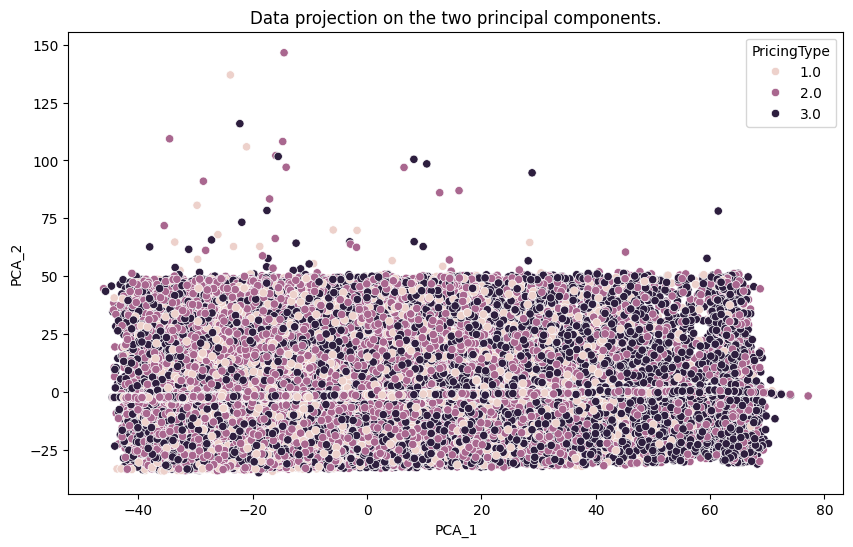

In [9]:
### Раскрасим точки в их классы

PCA_df = np.concatenate((X_pca.values, y.values.reshape(-1, 1)), axis=1)
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2', 'PricingType'])

plt.figure(figsize=(10, 6))

plt.title("Data projection on the two principal components.")
sns.scatterplot(data=PCA_df, x="PCA_1", y="PCA_2", hue="PricingType");

In [10]:
### Теперь выделим три компоненты

pca3 = PCA(n_components=3)

X_pca3 = pca3.fit_transform(X_centered)
X_pca3 = pd.DataFrame(X_pca3, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_df3 = np.concatenate((X_pca3.values, y.values.reshape(-1, 1)), axis=1)
PCA_df3 = pd.DataFrame(PCA_df3, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PricingType'])
PCA_df3.head()

,PCA_1,PCA_2,PCA_3,PricingType
0,-38.743132,-23.282634,-11.303274,2.0
1,-13.209252,-25.023815,5.664106,2.0
2,-2.004910,-1.637085,3.663032,2.0
3,17.178458,-0.907657,-3.191676,3.0
4,14.477389,-11.656752,22.999348,2.0


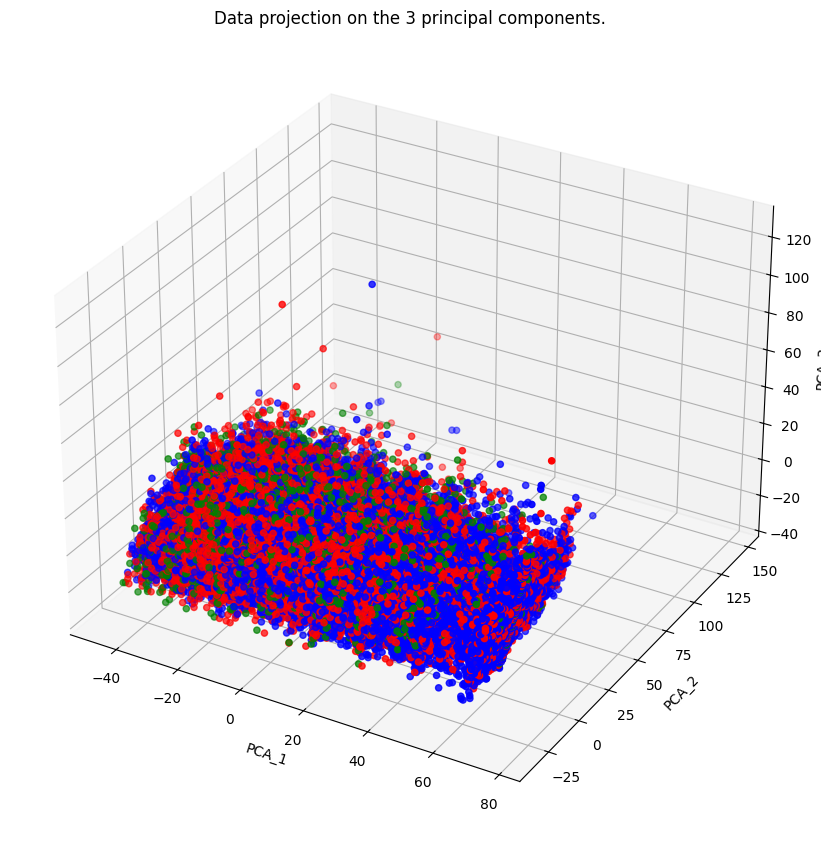

In [11]:
### Изобразим, пользуясь Axes3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

plt.title("Data projection on the 3 principal components.")
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")

colors = PCA_df3['PricingType'].replace([1, 2, 3], ['green', 'red', 'blue'])

ax.scatter(PCA_df3['PCA_1'],
           PCA_df3['PCA_2'],
           PCA_df3['PCA_3'], c=colors)

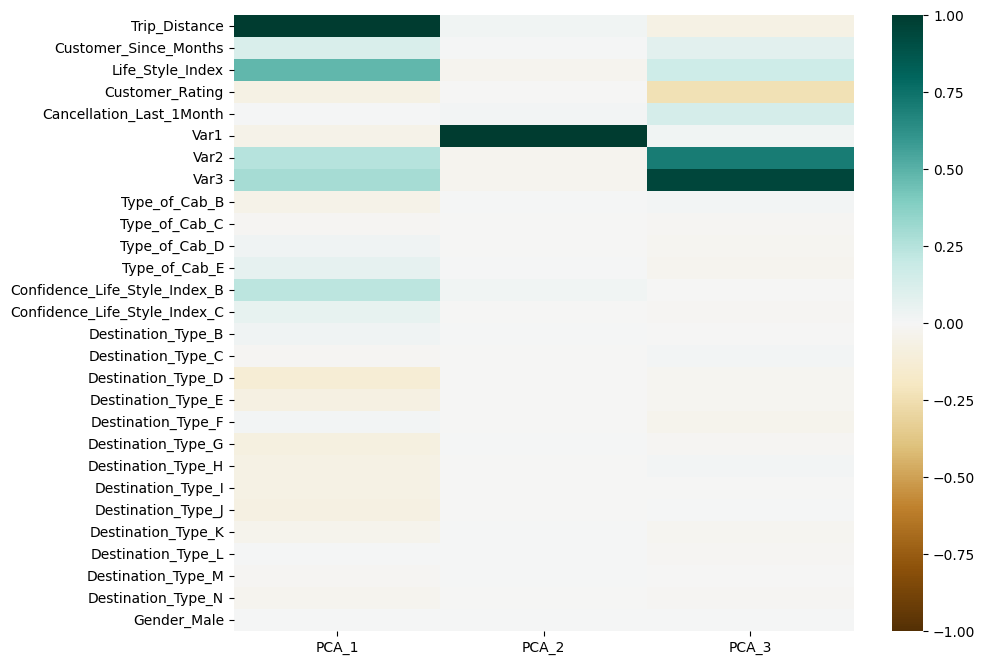

In [12]:
### Найдем корреляции

pc1_corr = X.corrwith(X_pca3['PCA_1'])
pc2_corr = X.corrwith(X_pca3['PCA_2'])
pc3_corr = X.corrwith(X_pca3['PCA_3'])

corrs = pd.concat((pc1_corr, pc2_corr, pc3_corr), axis=1)
corrs.columns = ['PCA_1', 'PCA_2', 'PCA_3']

plt.figure(figsize=(10, 8))
sns.heatmap(corrs,
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1);

--- Третья компонента содержит в себе информацию, по большей части, о переменных **Var2**, **Var3**, **Customer_Rating**

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [13]:
X_pca3.corr()

,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,-1.070332e-16,-2.367621e-16
PCA_2,-1.070332e-16,1.000000e+00,-6.880762e-17
PCA_3,-2.367621e-16,-6.880762e-17,1.000000e+00


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [14]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Разделим выборку

X_train, X_test, y_train, y_test = train_test_split(X_centered, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=2022)

In [15]:
### Построим пайплайн

pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('model', LogisticRegression())])

In [16]:
### Подберем лучшие гиперпараметры по сетке

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score ACC: {grid.best_score_}")
print(classification_report( y_test, grid.predict(X_test), digits=3))

Best parameters: {'model__C': 0.0001, 'model__penalty': 'l2'}
Best score ACC: 0.4807413040642287
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.692     0.566     11349
           3      0.494     0.509     0.501      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [17]:
### Теперь без PCA в пайплайне

pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', LogisticRegression(solver='saga'))])

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best score ACC: {grid.best_score_}")
print(classification_report( y_test, grid.predict(X_test), digits=3))

Best parameters: {'model__C': 0.001, 'model__penalty': 'l2'}
Best score ACC: 0.6803919317784358
              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. Нарисуйте графики зависимости accuracy, f1-score от количества компонент. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке.


In [18]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga'))])

    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}

    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)

    report = classification_report( y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'],
            report['weighted avg']['f1-score'])

In [19]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score

CPU times: user 2min 29s, sys: 3.2 s, total: 2min 33s
Wall time: 2min 11s


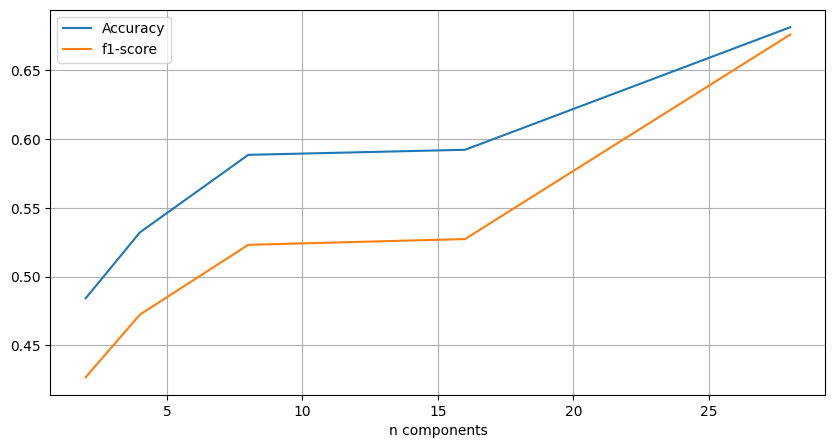

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(components_list, accuracy_dict.values(), label='Accuracy')
plt.plot(components_list, f1_score_dict.values(), label='f1-score')

plt.xlabel('n components')
plt.legend()
plt.grid();

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши? -- вероятно!

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов.

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [21]:
### Все по аналогии с PCA

from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, n_jobs=-1).fit_transform(X.head(2000))

<Axes: >

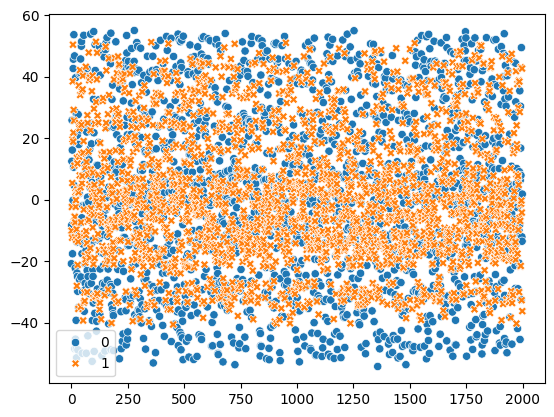

In [22]:
sns.scatterplot(X_tsne)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [ ]:
X_tsne_3d = TSNE(n_components=3).fit_transform(X_centered)

X_tsne_3d

### Преобразуем в pd.DataFrame

X_tsne_3d = np.concatenate((X_tsne_3d, y.values.reshape(-1, 1)),
                               axis=1)

X_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['t-SNE_1',
                                             't-SNE_2',
                                             't-SNE_3',
                                             'targ'])

In [ ]:

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

colors = X_tsne_3d['targ'].replace([1, 2, 3],
                                      ['orange', 'green', 'red'])

ax.scatter3D(X_tsne_3d['t-SNE_1'], 
             X_tsne_3d['t-SNE_2'],
             X_tsne_3d['t-SNE_3'], 
             c=colors)